# Project: No-show appointments
#### Welcome to 'No-show appointments' analysis file. Here we are about to dip into the data related to number of appointments made by anonymous patients, dates of these appointments and other charactaristics related to those patients.

#### Our target is to predict the adherence of patients to these appointments and the factors affecting it.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset in our hands here is about the **patients missing their scheduled appointments** in different hospitals in Brazil.  
- What is their **ratio**?   <br>
- What are the **variables** affecting this ratio, and to what **extent**?   <br>
- Are these variables related just to the patients **charactaristics** or demographics, the **hospitals**, or the **date and time** of the appointments?   <br>

This dataset includes 14 variables (columns):

1- PatientId  
2- AppointmentID  
3- Gender  
4- Scheduled Day  
5- Appointment Day  
6- Age  
7- Neighbourhood (the place at which the appointment takes place)  
8- Scholarship (relates to enrollment in **Bolsa Família**, which was a social welfare program of the Government of Brazil for poor Brazilian families.)  
9- Hypertension (if the patient is hypertensive)  
10- Diabetes (if the patient is diabetic)  
11- Alcoholism (if the patient is alcoholic)  
12- Handcap (if the patient suffered any type of disability)  
13- SMS_received (if the patient recieved at least one SMS for the appointment)  
14- No-show ('No' if the patient attended the appointment, 'Yes' if not)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\ElBasha\\Desktop\\AIPND\\2nd project\\work files\\noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### The column labels will be set to lower case to reduce errors.

In [4]:
df.columns= df.columns.str.lower()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

#### The columns 'patientid' and 'appointmentid' are to be dropped, as they are useless in the analysis process.

In [5]:
df.drop(['patientid','appointmentid'], axis = 1, inplace = True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Here we will highlight general information related to the shape and description of the data.<br>
Note: the data types of  **'scheduledday'** and  **'appointmentday'** need some adjustments.<br>
##### Good news: No null values !

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          110527 non-null  object
 1   scheduledday    110527 non-null  object
 2   appointmentday  110527 non-null  object
 3   age             110527 non-null  int64 
 4   neighbourhood   110527 non-null  object
 5   scholarship     110527 non-null  int64 
 6   hipertension    110527 non-null  int64 
 7   diabetes        110527 non-null  int64 
 8   alcoholism      110527 non-null  int64 
 9   handcap         110527 non-null  int64 
 10  sms_received    110527 non-null  int64 
 11  no-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


#### Lets pose a general view on the data.

In [7]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.shape

(110527, 12)

### Data Cleaning

#### 1- Fixing (or removing) errors and adjusting data types

From the table above, we notice the **'min'** variable indicating presence of **'age' of value -1**, which is impossible of course

In [9]:
df_agez = df[df['age']< 0].index
df_agez

Int64Index([99832], dtype='int64')

Fortunately, only one row has a negative value of **'age'**, so its preferable to be removed.

In [10]:
df.drop(df_agez, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          110526 non-null  object
 1   scheduledday    110526 non-null  object
 2   appointmentday  110526 non-null  object
 3   age             110526 non-null  int64 
 4   neighbourhood   110526 non-null  object
 5   scholarship     110526 non-null  int64 
 6   hipertension    110526 non-null  int64 
 7   diabetes        110526 non-null  int64 
 8   alcoholism      110526 non-null  int64 
 9   handcap         110526 non-null  int64 
 10  sms_received    110526 non-null  int64 
 11  no-show         110526 non-null  object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


#### 2- Convert **'scheduledday'** and **'appointmentday'** data type to timestamp

In [11]:
import datetime
df['appointmentday'] = df['appointmentday'].str.replace('T', ' ').str.replace('Z', '')
df['scheduledday'] = df['scheduledday'].str.replace('T', ' ').str.replace('Z', '')
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

#### 3- Removal of inappropriate values in 'handcap' column
Values in this column should de True or False only.

In [30]:
hnd_err = df[df['handcap']>1].index
df.drop(hnd_err, inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          110327 non-null  object        
 1   scheduledday    110327 non-null  datetime64[ns]
 2   appointmentday  110327 non-null  datetime64[ns]
 3   age             110327 non-null  int64         
 4   neighbourhood   110327 non-null  object        
 5   scholarship     110327 non-null  int64         
 6   hipertension    110327 non-null  int64         
 7   diabetes        110327 non-null  int64         
 8   alcoholism      110327 non-null  int64         
 9   handcap         110327 non-null  int64         
 10  sms_received    110327 non-null  int64         
 11  no-show         110327 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.9+ MB
None


<a id='eda'></a>
## Exploratory Data Analysis


### Q1: What's the attendance percntage?

79.81% of patients attended the appointments,
while 20.19% didnt.


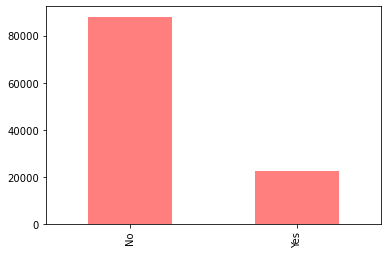

In [13]:
attd = df['no-show'].value_counts()[0]
not_att = df['no-show'].value_counts()[1]
totl_pt = df['no-show'].value_counts().sum()
df['no-show'].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='Who attended and who didnt')
print('{}% of patients attended the appointments,\nwhile {}% didnt.'.format(round(attd/totl_pt*100,2), round(not_att/totl_pt*100,2)))

We will divide the data to 2 dataframes: Who attended the appointments and who didn't, for future use.

In [14]:
no_df = df[df['no-show']=='No']
yes_df = df[df['no-show']=='Yes']

### Q2: Does the attendance of the appointments related to gender? and what is the ratio of attendance of each gender?

The data will be divided again to 2 dataframes: Female patients and male patients.

In [15]:
fem_df = df[df['gender']=='F']
male_df = df[df['gender']=='M']

Next, we will estimate the percentage of female patients generally, then attendance percentage of each gender.

65.02% of patients are females, while 34.98% are males.
79.69% of total females attended their appointments, while 80.02% of total male patients attended theirs.


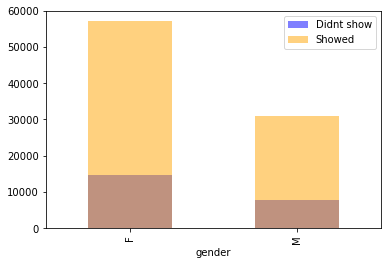

In [16]:
fem_p = round(df.gender.value_counts()[0]/df.gender.value_counts().sum()*100,2)
male_p = round(df.gender.value_counts()[1]/df.gender.value_counts().sum()*100,2)
fem_att = round(no_df.gender.value_counts()[0]/df.gender.value_counts()[0]*100,2)
male_att = round(no_df.gender.value_counts()[1]/df.gender.value_counts()[1]*100,2)

yes_df.groupby(['gender'])['age'].count().plot(kind='bar',alpha=0.5, color= 'blue', label='Didnt show')
no_df.groupby(['gender'])['age'].count().plot(kind='bar',alpha=0.5, color= 'orange', label='Showed')
plt.legend();
print('{}% of patients are females, while {}% are males.'.format(fem_p,male_p))
print('{}% of total females attended their appointments, while {}% of total male patients attended theirs.'.format(fem_att,male_att))

Females represent more than 65% of total patients, but the attendance precentage is nearly the same in both genders

### Q3: Is there any difference in mean of ages between showed and no-showed patients? Did this difference impact the attendance percentage? Is there any difference between mean of ages of males and females?

The mean of ages of attended people is 37.78 years, while 34.28 years in case of who didn't.


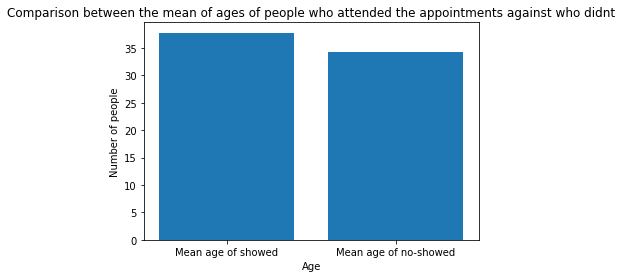

In [17]:
m_age_n = no_df.age.mean()
m_age_y = yes_df.age.mean()
plt.bar(['Mean age of showed','Mean age of no-showed'],[m_age_n,m_age_y]);
plt.title('Comparison between the mean of ages of people who attended the appointments against who didnt');
plt.xlabel('Age');
plt.ylabel('Number of people');
print("The mean of ages of attended people is {} years, while {} years in case of who didn't.".format(round(m_age_n,2),round(m_age_y,2)))

#### The next graph shows the comparison between mean of ages of males and females in both cases: the show and the no-show.

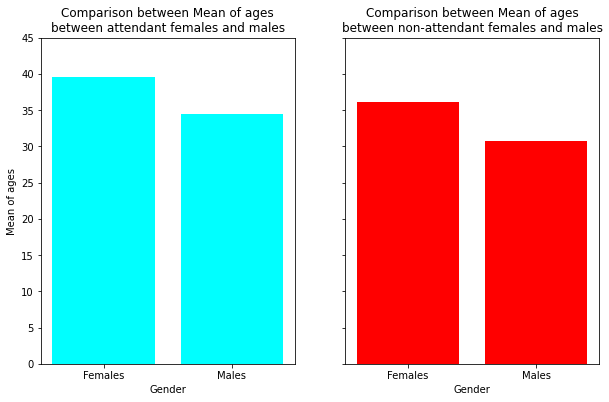

In [18]:
mean_shd = no_df.groupby(['gender']).age.mean()
mean_notshd = yes_df.groupby(['gender']).age.mean()
fig, (ms, mn) = plt.subplots(1, 2, figsize=(10, 6))
ms.bar(['Females','Males'],mean_shd,
       color = 'cyan')
ms.set(title = "Comparison between Mean of ages\nbetween attendant females and males",
       xlabel = "Gender",
       ylabel = "Mean of ages");
ms.set_ylim([0, 45])
mn.bar(['Females','Males'],mean_notshd,
        color = 'red')
mn.set(title = "Comparison between Mean of ages\nbetween non-attendant females and males",
       xlabel = "Gender",
       ylabel = "Mean of ages");
mn.set_ylim([0, 45])
for ax in fig.get_axes():
    ax.label_outer()
plt.show()

We notice the slight increase in mean of ages in case of attendant patients more than non-attendant. We also notice increase in mean of ages for females in both cases.

#### Lets plot the age against the number of appointments to see if there is any correlation between those variables.

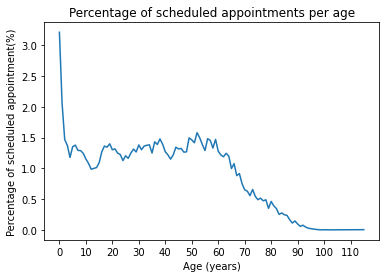

In [19]:
age_f = round(df['age'].value_counts().sort_index()/df['age'].value_counts().sum()*100,3)
age_fyp = round(yes_df['age'].value_counts().sort_index()/yes_df['age'].value_counts().sum()*100,3)
age_fnp = round(no_df['age'].value_counts().sort_index()/no_df['age'].value_counts().sum()*100,3)
plt.plot(age_f.index, age_f);
plt.title('Percentage of scheduled appointments per age');
plt.xlabel('Age (years)');
plt.ylabel('Percentage of scheduled appointment(%)');
plt.xticks(ticks=range(0,120,10));


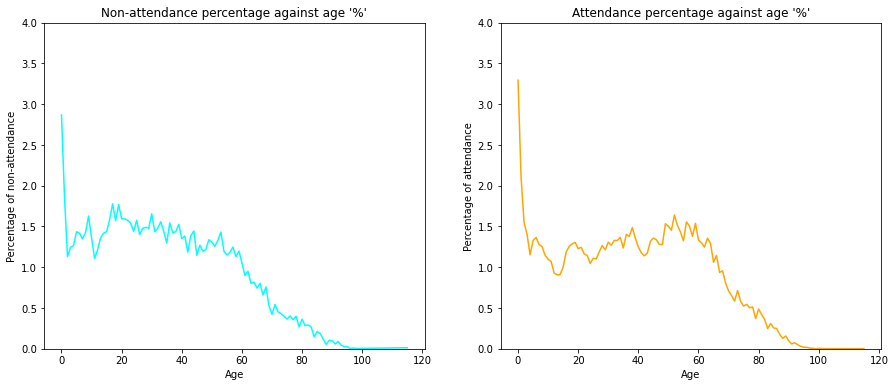

In [20]:
fig, (yp, np) = plt.subplots(1, 2, figsize=(15, 6))
yp.plot(age_fyp,
       color = 'cyan')
yp.set(title = "Non-attendance percentage against age '%'",
       xlabel = "Age",
       ylabel = "Percentage of non-attendance");
yp.set_ylim([0, 4])
np.plot(age_fnp,
       color = 'orange')
np.set(title = "Attendance percentage against age '%'",
       xlabel = "Age",
       ylabel = "Percentage of attendance");
np.set_ylim([0, 4])

plt.show()

### Q4: Does receiving SMSs for the appointments impact the attendance of patients?

#### First, a function should be done for the next variable assessments to avoid code repetition:

In [21]:
def comp_data(vcol):
    if vcol == 'sms_received':
        v1 = 'Recieved SMSs'
        v2 = 'Didnt recieve'
    elif vcol == 'scholarship':
        v1 = 'Recieved Bolsa Família'
        v2 = 'Didnt recieve Bolsa Família'
    elif vcol == 'hipertension':
        v1 = 'Hypertensive'
        v2 = 'Not Hypertensive'
    elif vcol == 'diabetes':
        v1 = 'Diabetic'
        v2 = 'Not Diabetic'
    elif vcol == 'alcoholism':
        v1 = 'ALcoholic'
        v2 = 'Not ALcoholic'
    elif vcol == 'handcap':
        v1 = 'Handicapped'
        v2 = 'Not Handicapped'
            
    no_r = no_df[vcol].value_counts()/no_df[vcol].value_counts().sum()
    yes_r = yes_df[vcol].value_counts()/yes_df[vcol].value_counts().sum()
    
    no_r.plot(kind='bar',alpha=0.5, color= 'blue', label='showed');
    yes_r.plot(kind='bar',alpha=0.5, color= 'orange', label='Didnt show').set_xticklabels([v2, v1], rotation='horizontal');
    plt.legend()
    
    print('People who attended: \n {}: {}%\n {}: {}%'.format(v1,round(no_r[1]*100,2),v2,round(no_r[0]*100,2)))
    print('\n')
    print('People who didnt attend: \n {}: {}%\n {}: {}%'.format(v1,round(yes_r[1]*100,2),v2,round(yes_r[0]*100,2)))
    print('\n')
    print('{}% of patients overall {}.'.format(round(df[vcol].value_counts()[1]/df[vcol].value_counts().sum()*100,2),v1))

Lets see the graph below:

People who attended: 
 Recieved SMSs: 29.14%
 Didnt recieve: 70.86%


People who didnt attend: 
 Recieved SMSs: 43.88%
 Didnt recieve: 56.12%


32.12% of patients overall Recieved SMSs.


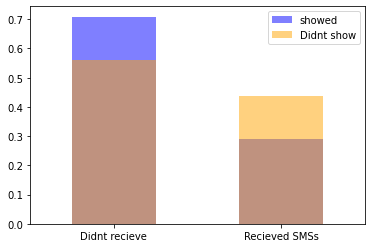

In [22]:
comp_data('sms_received')

### Q5: What is the impact of receiving Bolsa Família on attending the appointments?

People who attended: 
 Recieved Bolsa Família: 9.39%
 Didnt recieve Bolsa Família: 90.61%


People who didnt attend: 
 Recieved Bolsa Família: 11.57%
 Didnt recieve Bolsa Família: 88.43%


9.83% of patients overall Recieved Bolsa Família.


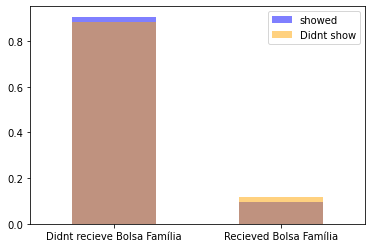

In [23]:
comp_data('scholarship')

### Q6: What is the impact of being handicapped on attendance of appointments?

People who attended: 
 Handicapped: 1.9%
 Not Handicapped: 98.1%


People who didnt attend: 
 Handicapped: 1.64%
 Not Handicapped: 98.36%


1.85% of patients overall Handicapped.


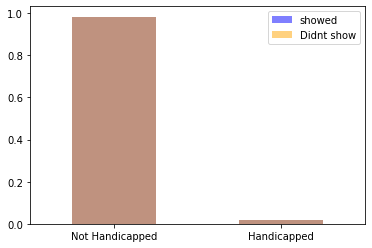

In [24]:
comp_data('handcap')

### Q7: What is the impact of being hypertensive on patients attendance?

People who attended: 
 Hypertensive: 20.41%
 Not Hypertensive: 79.59%


People who didnt attend: 
 Hypertensive: 16.82%
 Not Hypertensive: 83.18%


19.68% of patients overall Hypertensive.


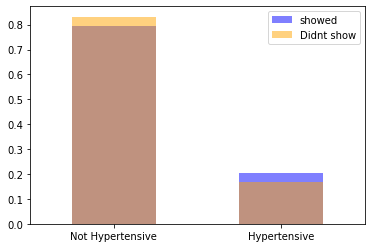

In [25]:
comp_data('hipertension')

### Q8: What is the impact of being Diabetic on patients attendance?

People who attended: 
 Diabetic: 7.36%
 Not Diabetic: 92.64%


People who didnt attend: 
 Diabetic: 6.38%
 Not Diabetic: 93.62%


7.16% of patients overall Diabetic.


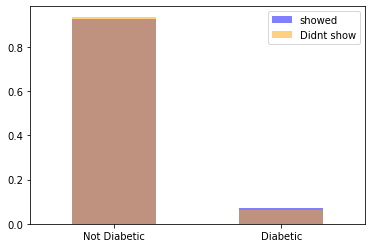

In [26]:
comp_data('diabetes')

### Q9: What is the impact of being Alcoholic on patients attendance?

People who attended: 
 ALcoholic: 3.04%
 Not ALcoholic: 96.96%


People who didnt attend: 
 ALcoholic: 3.03%
 Not ALcoholic: 96.97%


3.04% of patients overall ALcoholic.


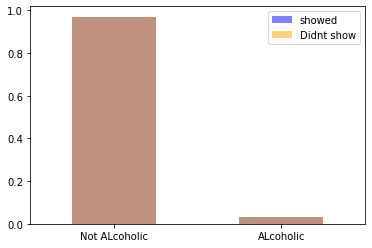

In [27]:
comp_data('alcoholism')

### Q10: Does the appointment day affect the attendance?

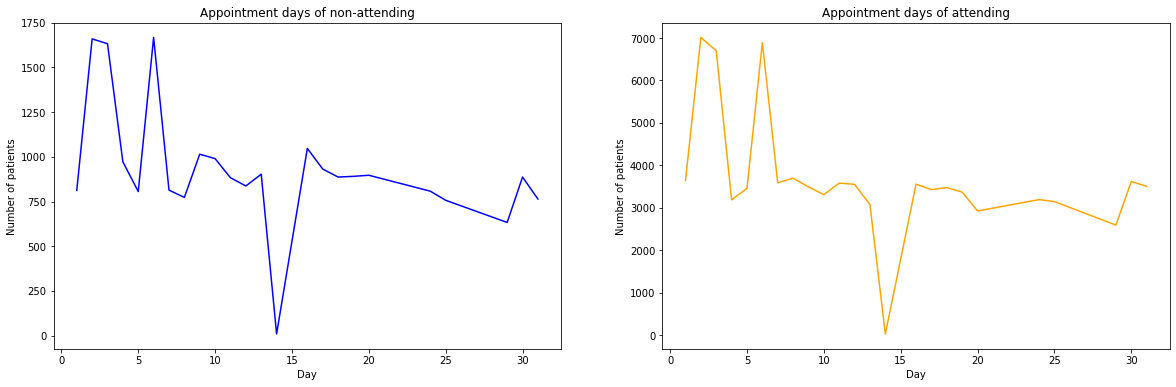

In [28]:
yes_d = yes_df.appointmentday.dt.day.value_counts().sort_index()
no_d = no_df.appointmentday.dt.day.value_counts().sort_index()
fig, (yd, nd) = plt.subplots(1, 2, figsize=(20, 6))
yd.plot(yes_d.index,yes_d,
       color = 'blue')
yd.set(title = "Appointment days of non-attending",
       xlabel = "Day",
       ylabel = "Number of patients");

nd.plot(no_d.index,no_d,
       color = 'orange')
nd.set(title = "Appointment days of attending",
       xlabel = "Day",
       ylabel = "Number of patients");


plt.show()

<a id='conclusions'></a>
## Conclusions

1- Nearly **80%** of patients **attended** their appointments, which is considered a good indication of **high concern about health** and keen to maintain healthy life.

2- **Females** represent more than **65%** of **total number** of patients, which may be indicative of **higher concern about health in females** more than males. However, the attendance percentage of both genders are nearly equal.

3- **Attended** patients have **higher mean of ages** than who didn't attend. We may conclude that people of higher age are more willing to attend their appointments. We found also than mean of ages of females is slightly higher than males, but the significance of these findings needs more data about ages of general population in Brazil.

4- **Higher percentage of attendance** was noticed at patients whose **ages below 2 years**, which indicates more concern about the health of children below 2 years old.

5- **Receiving SMSs** appears to **negatively correlates** with the **attendance** percentage! Only 29% of patient received SMSs attended their appointments, while nearly 44% of those who didn't receive SMSs attended theirs.

6- Only 9.39% of attended patients received Bolsa Família, while 11.57% of non-attendant patients received it. Although there is a slight difference, but there may be a **low negative correlation** between **receiving Bolsa Família** and **attendance**.

7- 20.41% of attendant patients are hypertensive, while 16.82% in non-attendants. This may be indicative of a **positive correlation** between being **hypertensive** and **attendance** of the appointmanets.

8- **No or minimal correlation** found between being **diabetic, alcoholic, or handicapped** and **attendance** of the appointments.

9- **No relative difference** between the ratio of **attended** appointments **and non attended** appointments **per each day** of the month. So, it's probable than there is no correlation between the appointment day and attendance.

#### limitations noticed in the data:

Not showing at the appointment is usually dependant on other not mentioned factors, like the distance between the residence and the appointment location, denisty of patients at the location (which may hinder the patient from attending or make them consider not to come), or their actual financial status (not known if receiving Bolsa Familia is a reflection of it). So, while those variables in the dataset may affect attendance, there are more prominant factors of more effect on 'No-show'.